# QELLE ÉVOLUTION DES IMPRESSIONS DE DOCUMENTS ?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta
from datetime import datetime,date
import matplotlib.pyplot as plt
import seaborn as sns
from kiblib.utils.db import DbConn
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params
import warnings
warnings.filterwarnings("ignore")

In [2]:
maj = dt.today().strftime('%d-%m-%Y à %Hh%M' )
print(f"Dernière mise à jour le {maj}")

db_conn = DbConn().create_engine()

query="""SELECT *
FROM statdb.stat_impressions si 
WHERE YEAR(date_impression)>='2019'"""

impressions = pd.read_sql(query,db_conn)

Dernière mise à jour le 17-05-2024 à 18h11


In [3]:
impressions['date_impression'] = impressions['date_impression'].astype('Datetime64')

impressions['date'] = pd.DatetimeIndex(impressions['date_impression']).date
impressions['semaine'] = impressions['date_impression'].dt.isocalendar().week
impressions['annee'] = impressions['date_impression'].dt.isocalendar().year

impressions_thisyear = impressions[impressions['date_impression'].dt.isocalendar().year == dt.today().year]

impressions_thisyear_byweek = impressions_thisyear.groupby('semaine')['nb_pages_imprimees'].sum().to_frame()

semaine_max = dt.today().isocalendar()[1] - 1
semaine_min = semaine_max - 4

impressions_4lastweek = impressions[impressions['semaine'].between(semaine_min,semaine_max)].groupby(['semaine','annee'])['nb_pages_imprimees'].sum().reset_index()

impressions_lastyears = impressions.groupby('annee')['nb_pages_imprimees'].sum().to_frame()

In [4]:
impressions_noiretblanc = impressions[impressions['type_impression']=='N&B']

impressions_noiretblanc['date_impression'] = impressions_noiretblanc['date_impression'].astype('Datetime64')

impressions_noiretblanc['date'] = pd.DatetimeIndex(impressions_noiretblanc['date_impression']).date
impressions_noiretblanc['semaine'] = impressions_noiretblanc['date_impression'].dt.isocalendar().week
impressions_noiretblanc['annee'] = impressions_noiretblanc['date_impression'].dt.isocalendar().year

impressions_noiretblanc_thisyear = impressions_noiretblanc[impressions_noiretblanc['date_impression'].dt.isocalendar().year == dt.today().year]

impressions_noiretblanc_thisyear_byweek = impressions_noiretblanc_thisyear.groupby('semaine')['nb_pages_imprimees'].sum().to_frame()

semaine_max = dt.today().isocalendar()[1]
semaine_min = semaine_max - 4

impressions_noiretblanc_4lastweek = impressions_noiretblanc[impressions_noiretblanc['semaine'].between(semaine_min,semaine_max)].groupby(['semaine','annee'])['nb_pages_imprimees'].sum().reset_index()

impressions_noiretblanc_lastyears = impressions_noiretblanc.groupby('annee')['nb_pages_imprimees'].sum().to_frame()

In [5]:
impressions_couleur = impressions[impressions['type_impression']=='COULEUR']

impressions_couleur['date_impression'] = impressions_couleur['date_impression'].astype('Datetime64')

impressions_couleur['date'] = pd.DatetimeIndex(impressions_couleur['date_impression']).date
impressions_couleur['semaine'] = impressions_couleur['date_impression'].dt.isocalendar().week
impressions_couleur['annee'] = impressions_couleur['date_impression'].dt.isocalendar().year

impressions_couleur_thisyear = impressions_couleur[impressions_couleur['date_impression'].dt.isocalendar().year == dt.today().year]

impressions_couleur_thisyear_byweek = impressions_couleur_thisyear.groupby('semaine')['nb_pages_imprimees'].sum().to_frame()

semaine_max = dt.today().isocalendar()[1]
semaine_min = semaine_max - 4

impressions_couleur_4lastweek = impressions_couleur[impressions_couleur['semaine'].between(semaine_min,semaine_max)].groupby(['semaine','annee'])['nb_pages_imprimees'].sum().reset_index()

impressions_couleur_lastyears = impressions_couleur.groupby('annee')['nb_pages_imprimees'].sum().to_frame()

# Impressions Total

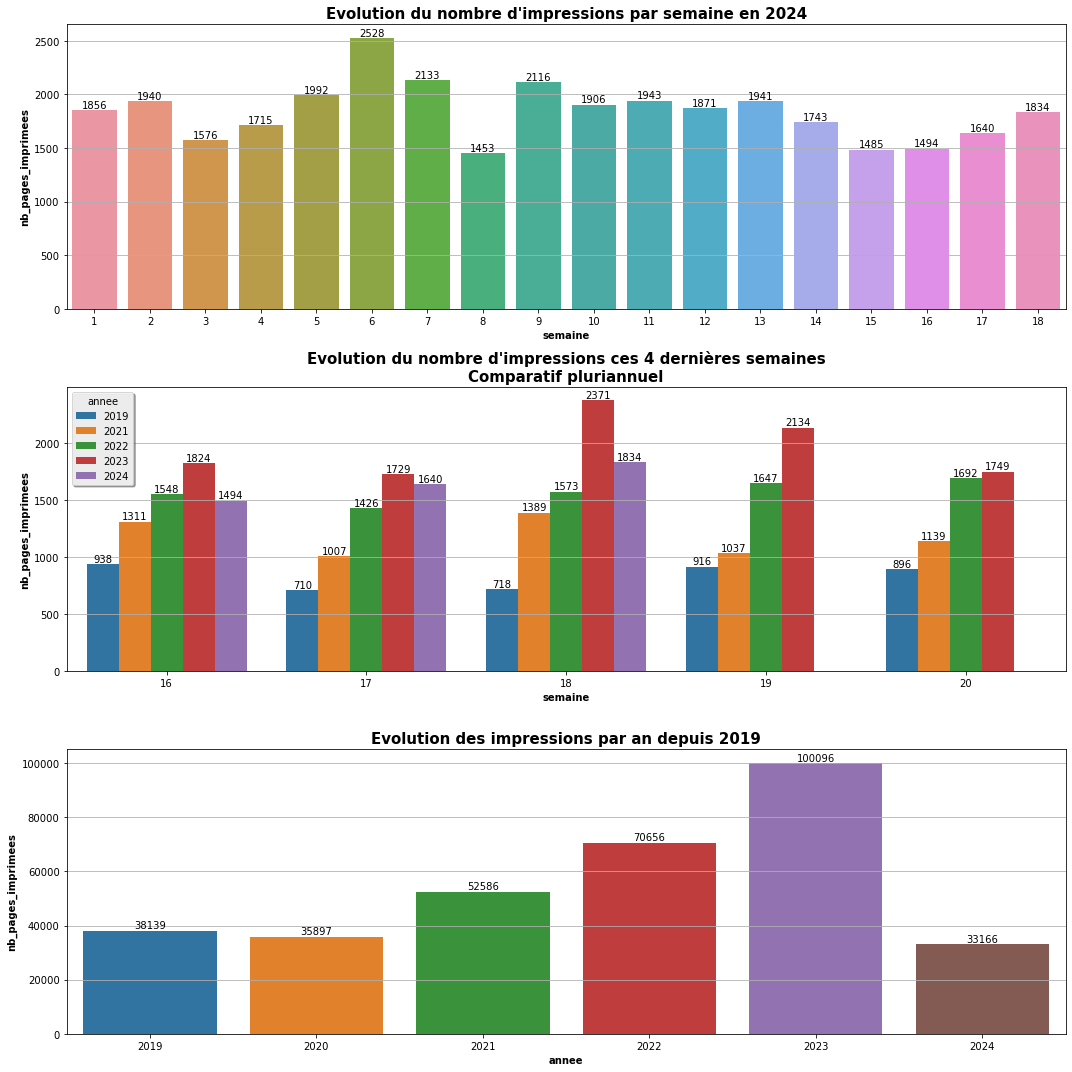

In [6]:
f,ax = plt.subplots(nrows=3,figsize=(15,15))

sns.barplot(data=impressions_thisyear_byweek,
            x=impressions_thisyear_byweek.index,
            y='nb_pages_imprimees',
            ax = ax[0]
           )
ax[0].set_title(f"Evolution du nombre d'impressions par semaine en {dt.today().isocalendar()[0]}")
for i in ax[0].containers:
    ax[0].bar_label(i,)


sns.barplot(data=impressions_4lastweek,
            x='semaine',
            y='nb_pages_imprimees',
            hue='annee',
            ax= ax[1]
           )

ax[1].set_title("Evolution du nombre d'impressions ces 4 dernières semaines\nComparatif pluriannuel")
for i in ax[1].containers:
    ax[1].bar_label(i,)



sns.barplot(data=impressions_lastyears,
            x=impressions_lastyears.index,
            y='nb_pages_imprimees',
            ax=ax[2]
           )
ax[2].set_title(f"Evolution des impressions par an depuis {(dt.today().isocalendar()[0]) - 5}")


for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()                  

#  Impressions Noir & Blanc

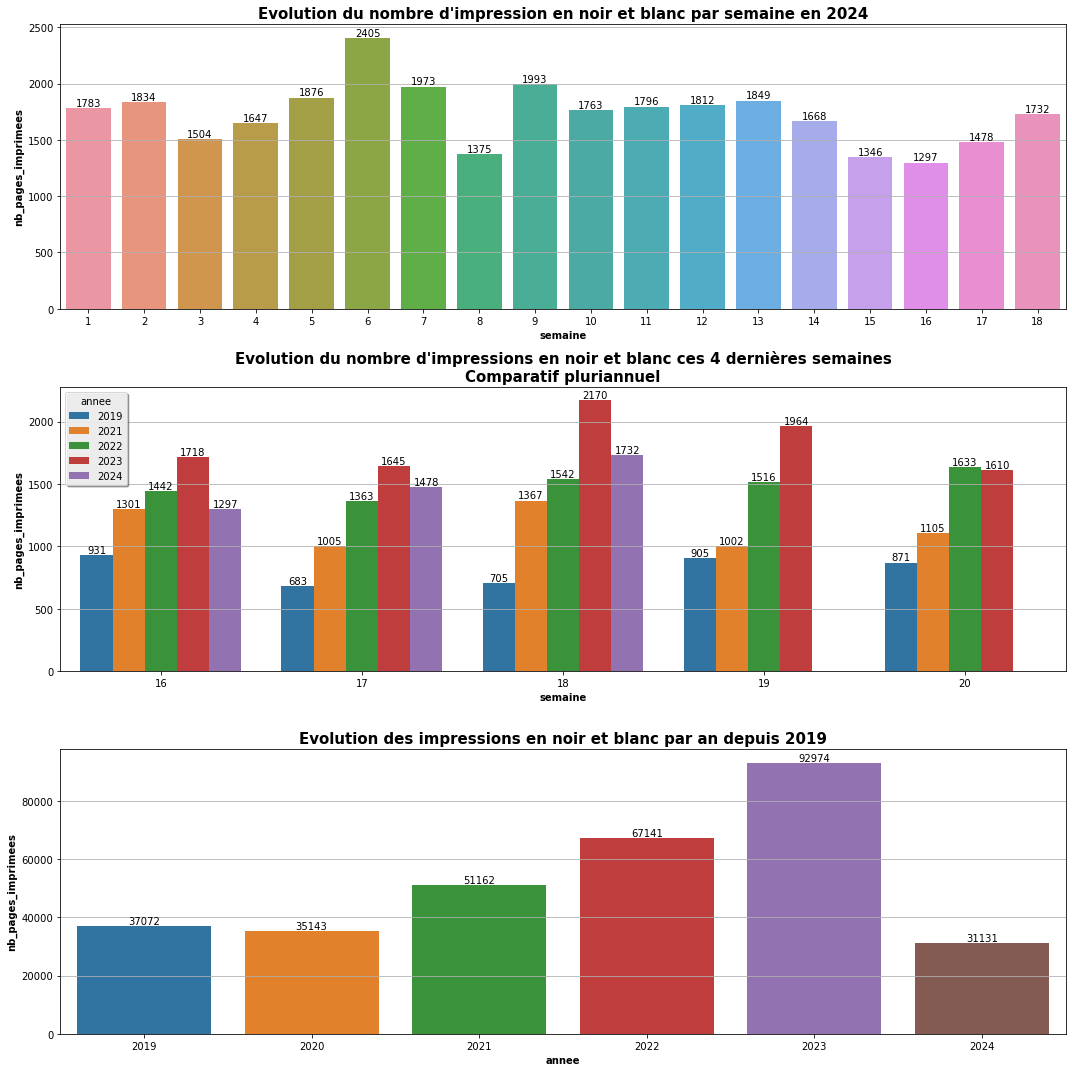

In [7]:
f,ax = plt.subplots(nrows=3,figsize=(15,15))

sns.barplot(data=impressions_noiretblanc_thisyear_byweek,
            x=impressions_noiretblanc_thisyear_byweek.index,
            y='nb_pages_imprimees',
            ax = ax[0]
           )
ax[0].set_title(f"Evolution du nombre d'impression en noir et blanc par semaine en {dt.today().isocalendar()[0]}")
for i in ax[0].containers:
    ax[0].bar_label(i,)


sns.barplot(data=impressions_noiretblanc_4lastweek,
            x='semaine',
            y='nb_pages_imprimees',
            hue='annee',
            ax= ax[1]
           )

ax[1].set_title("Evolution du nombre d'impressions en noir et blanc ces 4 dernières semaines\nComparatif pluriannuel")
for i in ax[1].containers:
    ax[1].bar_label(i,)



sns.barplot(data=impressions_noiretblanc_lastyears,
            x=impressions_noiretblanc_lastyears.index,
            y='nb_pages_imprimees',
            ax=ax[2]
           )
ax[2].set_title(f"Evolution des impressions en noir et blanc par an depuis {(dt.today().isocalendar()[0]) - 5}")


for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()

# Impressions Couleur

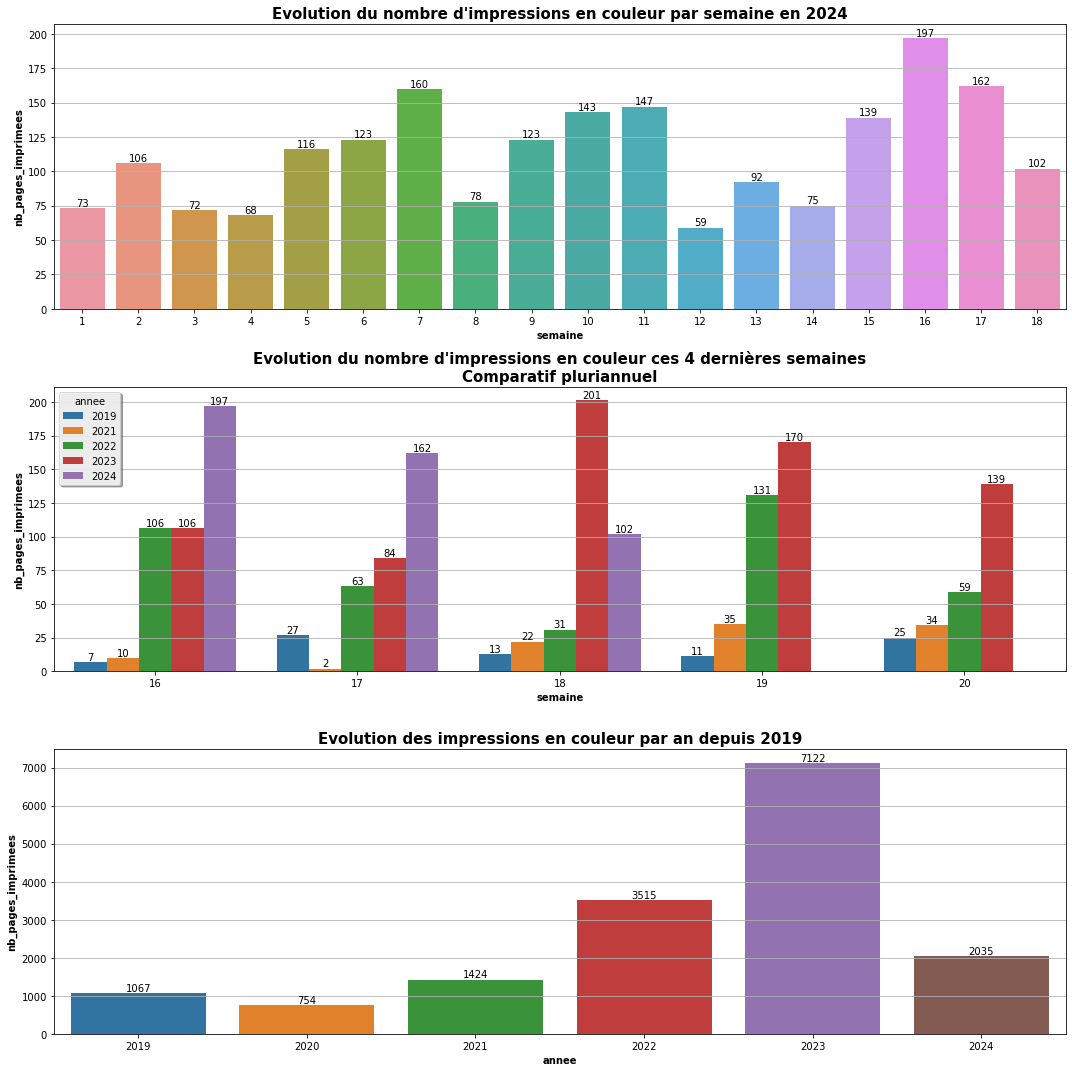

In [8]:
f,ax = plt.subplots(nrows=3,figsize=(15,15))

sns.barplot(data=impressions_couleur_thisyear_byweek,
            x=impressions_couleur_thisyear_byweek.index,
            y='nb_pages_imprimees',
            ax = ax[0]
           )
ax[0].set_title(f"Evolution du nombre d'impressions en couleur par semaine en {dt.today().isocalendar()[0]}")
for i in ax[0].containers:
    ax[0].bar_label(i,)


sns.barplot(data=impressions_couleur_4lastweek,
            x='semaine',
            y='nb_pages_imprimees',
            hue='annee',
            ax= ax[1]
           )

ax[1].set_title("Evolution du nombre d'impressions en couleur ces 4 dernières semaines\nComparatif pluriannuel")
for i in ax[1].containers:
    ax[1].bar_label(i,)



sns.barplot(data=impressions_couleur_lastyears,
            x=impressions_couleur_lastyears.index,
            y='nb_pages_imprimees',
            ax=ax[2]
           )
ax[2].set_title(f"Evolution des impressions en couleur par an depuis {(dt.today().isocalendar()[0]) - 5}")


for i in ax[2].containers:
    ax[2].bar_label(i,)

f.tight_layout()